In [ ]:
#!python -m spacy download el_core_news_sm

In [3]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
nlp = spacy.load('el_core_news_sm')

In [6]:
athensvoice_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telikh Ergasia Tsalla Vasilikh.csv')
athensvoice_df

,Unnamed: 0,site,url,section,title,date,full_text
0,0,athensvoice.gr,https://www.athensvoice.gr/epikairotita/ellada...,Ελλαδα,Μάχη για τη ζωή δίνει η 14χρονη μετά από τροχα...,2023-07-14T08:29:00Z,Η 14χρονη Χριστίνα βρίσκεται σε κρίσιμη κατάστ...
1,1,athensvoice.gr,https://www.athensvoice.gr/epikairotita/ellada...,Ελλαδα,Αυτοκίνητο έπεσε σε γκρεμό στην Κρήτη - Εγκλωβ...,2023-07-12T05:26:22Z,Ένα τροχαίο ατύχημα σημειώθηκε στα Φαλάσαρνα Κ...
2,2,athensvoice.gr,https://www.athensvoice.gr/epikairotita/ellada...,Ελλαδα,Ένας τραυματίας σε τροχαίο με αγριογούρουνο στ...,2023-07-11T17:38:19Z,Ένας 37χρονος άνδρας τραυματίστηκε μετά από τρ...
3,3,athensvoice.gr,https://www.athensvoice.gr/epikairotita/ellada...,Ελλαδα,Tροχαίο ατύχημα με νταλίκα που κουβαλούσε λαμα...,2023-07-11T12:35:21Z,Κλειστός είναι περίπου από τις 12:30 ο αυτοκιν...
4,4,athensvoice.gr,https://www.athensvoice.gr/epikairotita/ellada...,Ελλαδα,Πάτρα: Διασωληνωμένη 14χρονη έπειτα από τροχαί...,2023-07-10T04:55:24Z,Μάχη για να κρατηθεί στη ζωή δίνει μια 14χρονη...
...,...,...,...,...,...,...,...
225,225,athensvoice.gr,https://www.athensvoice.gr/epikairotita/ellada...,Ελλαδα,Θεσσαλονίκη: Αυτοκίνητο «καρφώθηκε» σε κολόνα,2020-01-24T08:24:00Z,Τροχαίο ατύχημα σημειώθηκε τα ξημερώματα της Π...
226,226,athensvoice.gr,https://www.athensvoice.gr/epikairotita/ellada...,Ελλαδα,Στη ΜΕΘ του ΓΝΑ μεταφέρθηκε ο Τάσος Μπουντούρης,2020-01-22T12:33:00Z,Στη Μονάδα Εντατικής Θεραπείας του 251 Γενικού...
227,227,athensvoice.gr,https://www.athensvoice.gr/epikairotita/ellada...,Ελλαδα,Τάσος Μπουντούρης: Βίντεο-ντοκουμέντο αμέσως μ...,2020-01-21T14:55:28Z,"Σε κρίσιμη, αλλά σταθερή κατάσταση νοσηλεύεται..."
228,228,athensvoice.gr,https://www.athensvoice.gr/life/health-fitness...,Health & Fitness,Τάσος Μπουντούρης: Οδύσσεια για ένα κρεβάτι Εν...,2020-01-21T14:09:00Z,"Εκτός από μάχη να κρατηθεί στη ζωή, ο ολυμπιον..."


In [7]:
newsbomb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proxeiro 2.csv')
newsbomb_df

,Unnamed: 0,site,url,section,title,date,full_text,datetime
0,0,newsbomb.gr,https://www.newsbomb.gr/sports/podosfairo/stor...,ΠΟΔΟΣΦΑΙΡΟ,"Λιονέλ Μέσι: Παραβίασε κόκκινο φανάρι, γλίτωσε...",2023-07-16T15:58:17+03:00,Λιονέλ Μέσι: Επεισοδιακές είναι η πρώτες ημέρε...,2023-07-16 15:58:17+03:00
1,1,newsbomb.gr,https://www.newsbomb.gr/ellada/story/1448567/l...,ΕΛΛΑΔΑ,Λαμία: Απίστευτες εικόνες με αυτοκίνητο να «κα...,2023-07-15T08:53:22+03:00,Λαμία: To αυτοκίνητο αφού χτύπησε ένα άλλο στη...,2023-07-15 08:53:22+03:00
2,2,newsbomb.gr,https://www.newsbomb.gr/ellada/story/1448513/s...,ΕΛΛΑΔΑ,Σοβαρό τροχαίο με τρεις τραυματίες στην Εθνική...,2023-07-15T01:06:22+03:00,Οι τραυματίες διακομίστηκαν στο νοσοκομείο ΑΧΕ...,2023-07-15 01:06:22+03:00
3,3,newsbomb.gr,https://www.newsbomb.gr/ellada/story/1448504/t...,ΕΛΛΑΔΑ,Τροχαίο με αγριογούρουνο στην Αταλάντη - Πληθα...,2023-07-14T23:32:47+03:00,Ένα ακόμη τροχαίο ατύχημα με αγριογούρουνο σημ...,2023-07-14 23:32:47+03:00
4,4,newsbomb.gr,https://www.newsbomb.gr/ellada/story/1448196/i...,ΕΛΛΑΔΑ,Ίλιον: Τροχαίο ατύχημα με αστυνομικούς της ομά...,2023-07-14T08:34:55+03:00,Τροχαίο με τραυματίες αστυνομικούς της ομάδας ...,2023-07-14 08:34:55+03:00
...,...,...,...,...,...,...,...,...
870,870,newsbomb.gr,https://www.newsbomb.gr/kosmos/story/1042962/t...,ΚΟΣΜΟΣ,Τροχαίο ατύχημα για βουλευτή: Ήταν υπό την επή...,2020-01-03T15:43:36+02:00,Αναλαμβάνει πλήρως την ευθύνη και μετανιώνει λ...,2020-01-03 15:43:36+02:00
871,871,newsbomb.gr,https://www.newsbomb.gr/kosmos/story/1042754/v...,ΚΟΣΜΟΣ,Βίντεο - ΣΟΚ: Κατέγραψε τον εαυτό του να τρακά...,2020-01-03T12:08:16+02:00,Η εικόνα προκαλεί ΣΟΚ… Το περιστατικό συνέβη σ...,2020-01-03 12:08:16+02:00
872,872,newsbomb.gr,https://www.newsbomb.gr/ellada/story/1042781/t...,ΕΛΛΑΔΑ,ΤΩΡΑ: Τροχαίο στην Αθηνών - Λαμίας - Σφοδρή σύ...,2020-01-02T20:35:11+02:00,Διαλύθηκε το Ι.Χ. Καθυστερήσεις σημειώνονται σ...,2020-01-02 20:35:11+02:00
873,873,newsbomb.gr,https://www.newsbomb.gr/ellada/story/1041926/t...,ΕΛΛΑΔΑ,Τροχαίο στην άνοδο του Κηφισό - Ουρές χιλιομέτ...,2019-12-30T09:26:41+02:00,Τροχαίο ατύχημα σημειώθηκε το πρωί της Δευτέρα...,2019-12-30 09:26:41+02:00


In [8]:
athensvoice_text = athensvoice_df['full_text'].str.cat(sep = ' ')

In [9]:
newsbomb_text = newsbomb_df['full_text'].str.cat(sep = ' ')

In [10]:
two_sites_list = []
athensvoiceD = {'site' : 'athensvoice.gr', 'text' : athensvoice_text}
two_sites_list.append(athensvoiceD)
newsbombD = {'site' : 'newsbomb.gr', 'text' : newsbomb_text}
two_sites_list.append(newsbombD)
two_sites_df = pd.DataFrame(two_sites_list)
two_sites_df

,site,text
0,athensvoice.gr,Η 14χρονη Χριστίνα βρίσκεται σε κρίσιμη κατάστ...
1,newsbomb.gr,Λιονέλ Μέσι: Επεισοδιακές είναι η πρώτες ημέρε...


In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])

In [12]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
print("cosine scores ==> ", arr)

cosine scores ==>  [[1.         0.82849838]
 [0.82849838 1.        ]]


([<matplotlib.axis.YTick at 0x7aaa62e8e650>,
 [Text(0, 0, 'athensvoice.gr'), Text(0, 1, 'newsbomb.gr')])

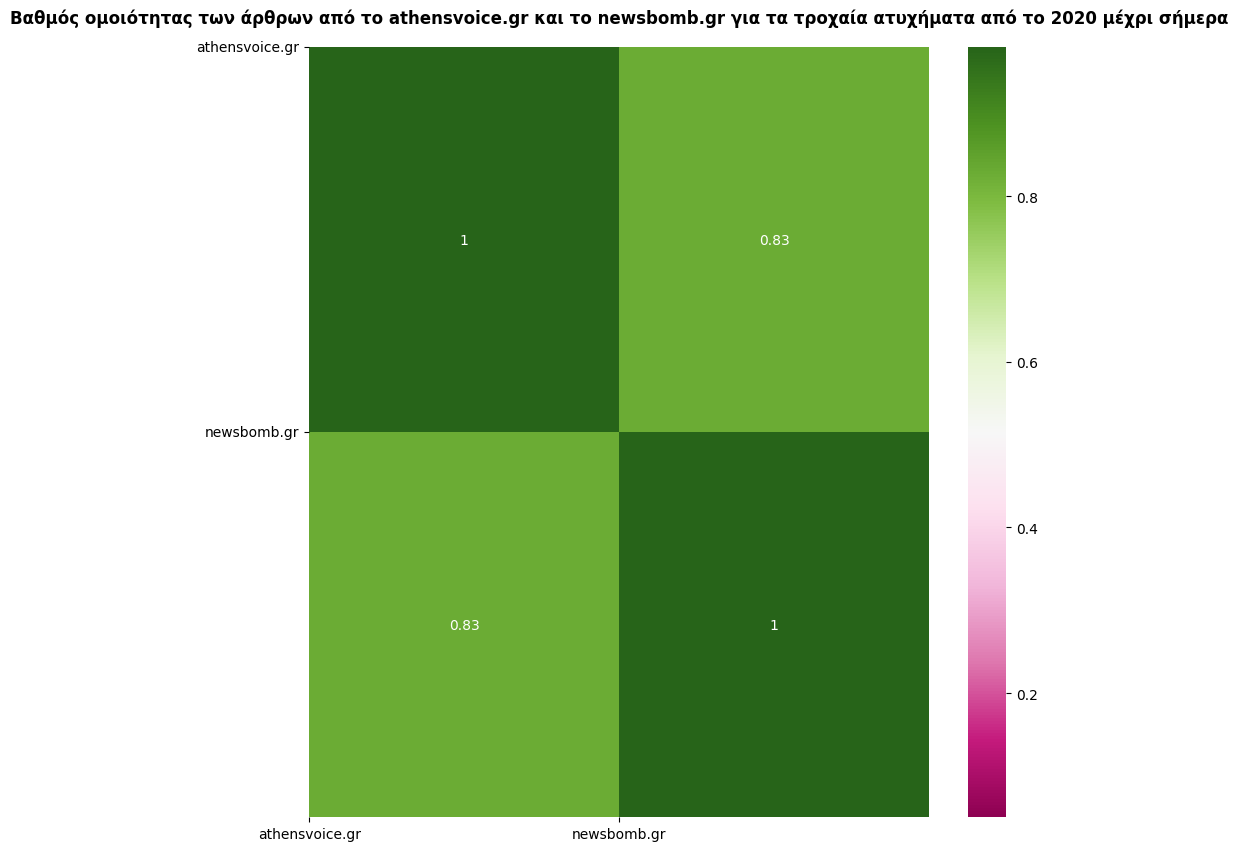

In [13]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των άρθρων από το athensvoice.gr και το newsbomb.gr για τα τροχαία ατυχήματα από το 2020 μέχρι σήμερα', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG") # το vmin και το vmax ορίζουν πάνω και κάτω από ποιο αριθμό ομοιότητας θα εμφανίζεται το ντεγκραντέ των δύο ακραίων χρωμάτων
plt.xticks([0, 1], ['athensvoice.gr', 'newsbomb.gr']) # ορίζω να εμφανίζονται τα ονόματα των sites αντί για το 0 και 1 του index, στον άξονα x
plt.yticks([0, 1], ['athensvoice.gr', 'newsbomb.gr'], rotation=0)